<a href="https://colab.research.google.com/github/Cloudcredits/Cloudcredit-project/blob/main/ZOMATO_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
dataset = pd.read_csv("/content/Zomato data .csv")
print(dataset.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [ ]:
dataset.shape

(148, 7)

**Data Preprocessing**

In [ ]:
import pandas as pd

df = pd.read_csv("/content/Zomato data .csv")
df.rename(columns={
    'approx_cost(for two people)': 'cost',
    'listed_in(type)': 'service_type'
}, inplace=True)

df['rate'] = df['rate'].str.replace('/5', '', regex=False)
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

df['online_order'] = df['online_order'].map({'Yes': True, 'No': False})
df['book_table'] = df['book_table'].map({'Yes': True, 'No': False})

df.drop_duplicates(inplace=True)

df.dropna(inplace=True)

print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          148 non-null    object 
 1   online_order  148 non-null    bool   
 2   book_table    148 non-null    bool   
 3   rate          148 non-null    float64
 4   votes         148 non-null    int64  
 5   cost          148 non-null    int64  
 6   service_type  148 non-null    object 
dtypes: bool(2), float64(1), int64(2), object(2)
memory usage: 6.2+ KB
None
                    name  online_order  book_table  rate  votes  cost  \
0                  Jalsa          True        True   4.1    775   800   
1         Spice Elephant          True       False   4.1    787   800   
2        San Churro Cafe          True       False   3.8    918   800   
3  Addhuri Udupi Bhojana         False       False   3.7     88   300   
4          Grand Village         False       False   3.8    166   60

In [ ]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (df.dtypes == 'int64')
int_cols = list(int_[int_].index)
print("Integer variables:", len(int_cols))

fl = (df.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 2
Integer variables: 2
Float variables: 1


**Exploratory Data Analysis (EDA) Heatmap Code Using Seaborn**

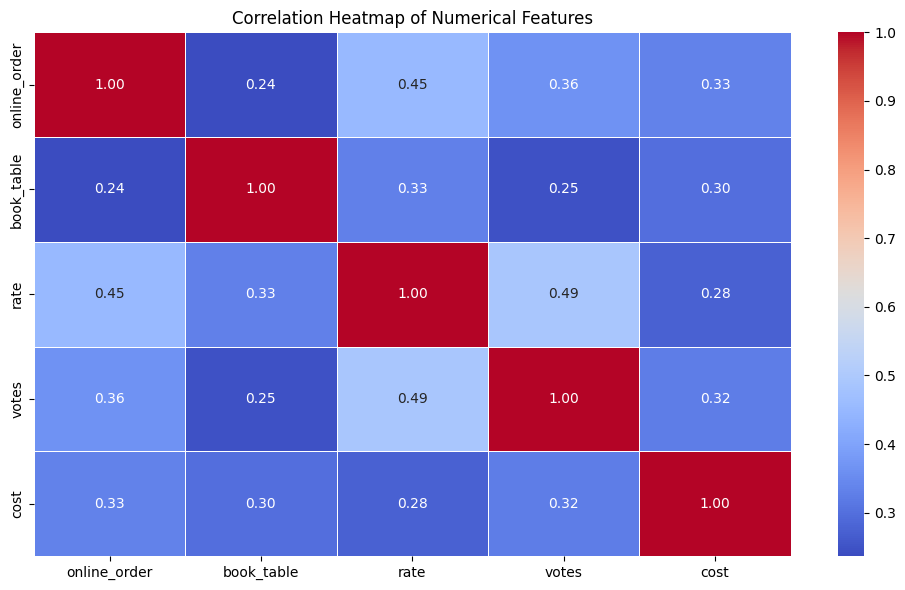

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix for numerical features
correlation_matrix = df.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Draw the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")

# Set the title and display the heatmap
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

**Top 10 Restaurant Chains**

<ipython-input-12-2054adf1b59a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_chains.values, y=top_chains.index, palette='viridis')


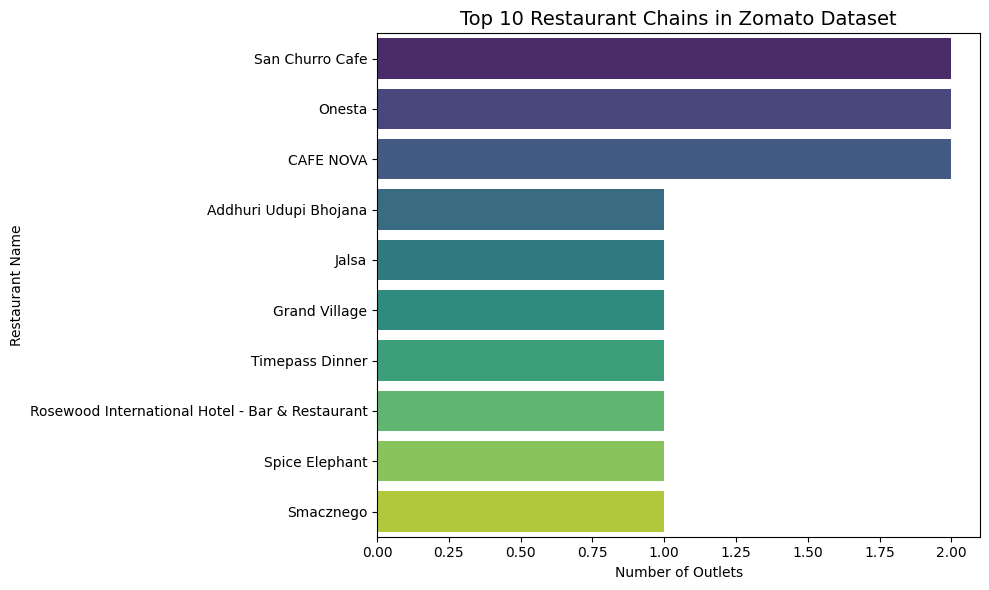

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Count occurrences of each restaurant name
top_chains = df['name'].value_counts().head(10)

# Plot the top restaurant chains
plt.figure(figsize=(10, 6))
sns.barplot(x=top_chains.values, y=top_chains.index, palette='viridis')

# Add titles and labels
plt.title("Top 10 Restaurant Chains in Zomato Dataset", fontsize=14)
plt.xlabel("Number of Outlets")
plt.ylabel("Restaurant Name")
plt.tight_layout()
plt.show()

**Best cuisine categories**

<ipython-input-14-ed9d2cc8b613>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_types.values, y=popular_types.index, palette='Set2')


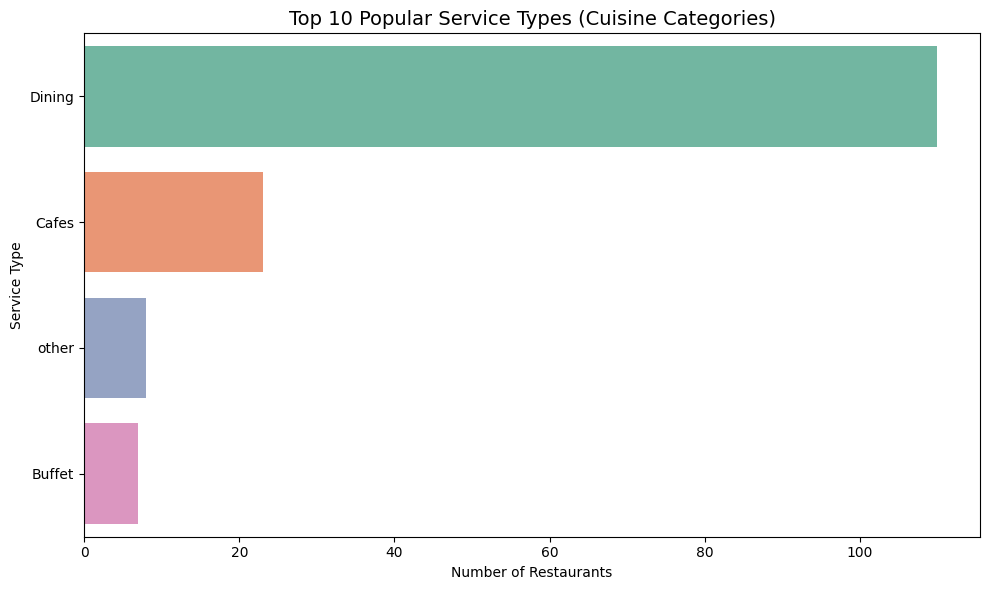

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/Zomato data .csv")

# Rename the column for easier reference
df.rename(columns={'listed_in(type)': 'service_type'}, inplace=True)

# Count and sort popular service types (could be interpreted as cuisine categories)
popular_types = df['service_type'].value_counts().head(10)

# Plot the top service types
plt.figure(figsize=(10, 6))
sns.barplot(x=popular_types.values, y=popular_types.index, palette='Set2')

# Add titles and labels
plt.title("Top 10 Popular Service Types (Cuisine Categories)", fontsize=14)
plt.xlabel("Number of Restaurants")
plt.ylabel("Service Type")
plt.tight_layout()
plt.show()


**Online ordering availability**

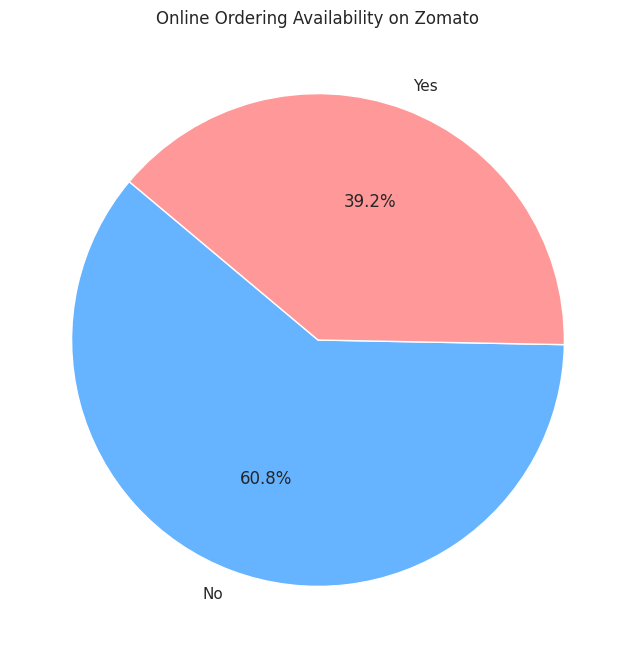

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = '/content/Zomato data .csv'
zomato_data = pd.read_csv(file_path)

# Count the occurrences of 'Yes' and 'No' in 'online_order'
online_order_counts = zomato_data['online_order'].value_counts(dropna=False)

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    online_order_counts,
    labels=online_order_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff', '#ff9999']
)
plt.title('Online Ordering Availability on Zomato')
plt.show()


**Table booking availability**

<ipython-input-21-556290303596>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=table_booking_counts.index, y=table_booking_counts.values, palette='pastel')


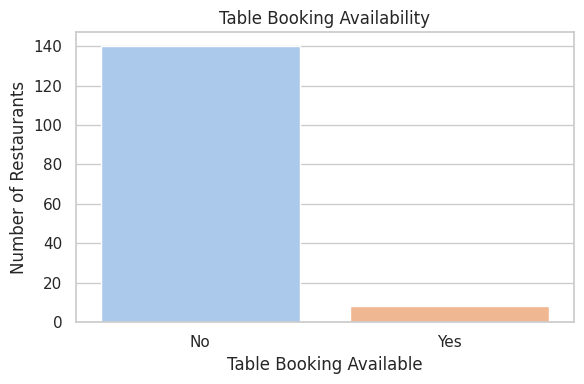

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("/content/Zomato data .csv", encoding='latin-1')

# Set the plot style
sns.set(style="whitegrid")

# Count values for book_table column
table_booking_counts = df['book_table'].value_counts()

# Create bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x=table_booking_counts.index, y=table_booking_counts.values, palette='pastel')

# Add labels and title
plt.title('Table Booking Availability')
plt.xlabel('Table Booking Available')
plt.ylabel('Number of Restaurants')

# Display the plot
plt.tight_layout()
plt.show()


**Rating distribution**

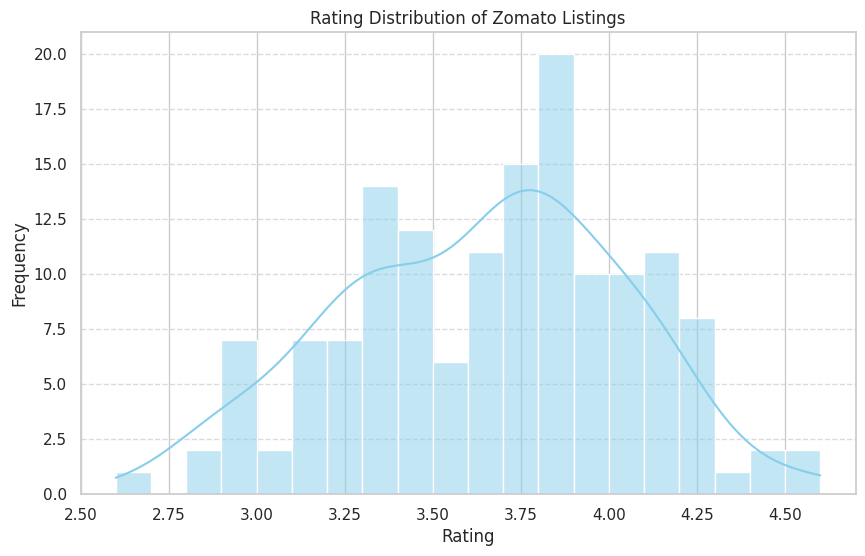

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/Zomato data .csv'
zomato_data = pd.read_csv(file_path)

# Clean the 'rate' column
# Remove '/5', handle missing or invalid entries
zomato_data['rate_cleaned'] = zomato_data['rate'].replace('NEW', pd.NA)
zomato_data['rate_cleaned'] = zomato_data['rate_cleaned'].str.extract(r'(\d+\.?\d*)')
zomato_data['rate_cleaned'] = pd.to_numeric(zomato_data['rate_cleaned'], errors='coerce')

# Drop NaN values for ratings
rating_data = zomato_data['rate_cleaned'].dropna()

# Plot rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(rating_data, bins=20, kde=True, color='skyblue')
plt.title('Rating Distribution of Zomato Listings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Votes vs. Rating**

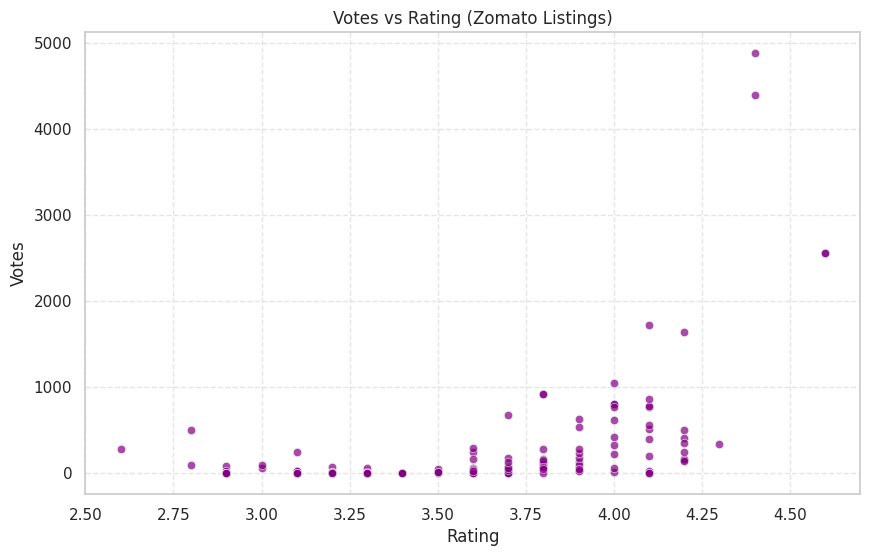

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/Zomato data .csv'
zomato_data = pd.read_csv(file_path)

# Clean the 'rate' column
zomato_data['rate_cleaned'] = zomato_data['rate'].replace('NEW', pd.NA)
zomato_data['rate_cleaned'] = zomato_data['rate_cleaned'].str.extract(r'(\d+\.?\d*)')
zomato_data['rate_cleaned'] = pd.to_numeric(zomato_data['rate_cleaned'], errors='coerce')

# Drop missing data
votes_rating_data = zomato_data.dropna(subset=['rate_cleaned', 'votes'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rate_cleaned', y='votes', data=votes_rating_data, color='purple', alpha=0.7)
plt.title('Votes vs Rating (Zomato Listings)')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()


**Cost Analysis**

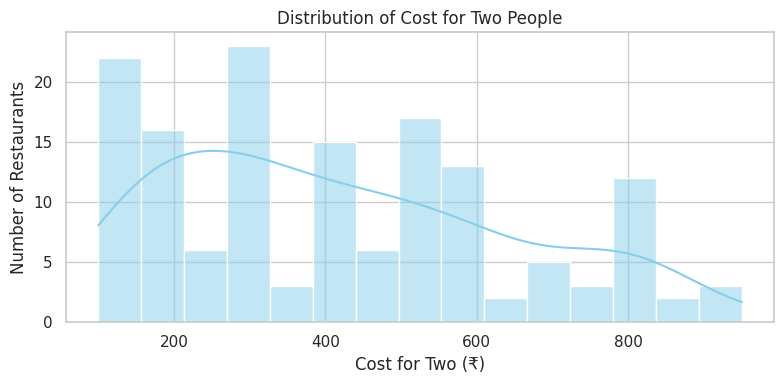

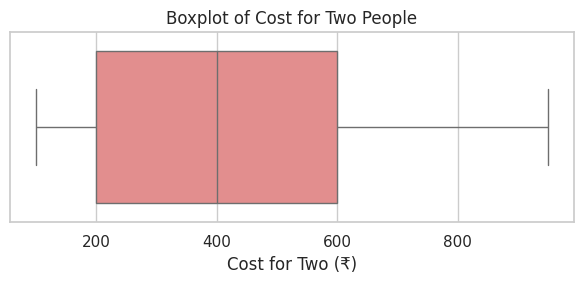

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Zomato data .csv", encoding='latin-1')

# Rename column for easier access
df.rename(columns={'approx_cost(for two people)': 'cost_for_two'}, inplace=True)

# Ensure cost column is numeric (if there are commas or invalid entries)
df['cost_for_two'] = pd.to_numeric(df['cost_for_two'], errors='coerce')

# Drop missing values if any
df = df.dropna(subset=['cost_for_two'])

# Set plot style
sns.set(style="whitegrid")

# Histogram of cost for two
plt.figure(figsize=(8, 4))
sns.histplot(df['cost_for_two'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Cost for Two People')
plt.xlabel('Cost for Two (₹)')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

# Boxplot for spotting outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['cost_for_two'], color='lightcoral')
plt.title('Boxplot of Cost for Two People')
plt.xlabel('Cost for Two (₹)')
plt.tight_layout()
plt.show()


**Types of Restaurants**

<ipython-input-2-0b12548c1a17>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=restaurant_types.index, x=restaurant_types.values, palette='coolwarm')


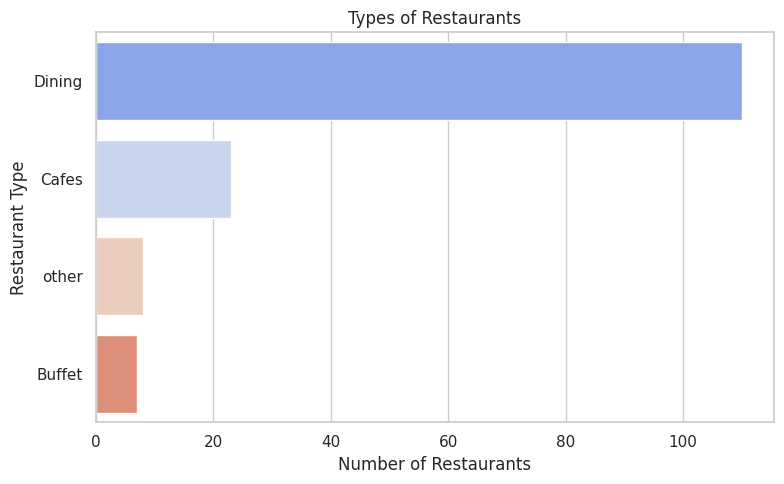

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/Zomato data .csv", encoding='latin-1')

# Set plot style
sns.set(style="whitegrid")

# Count the types of restaurants
restaurant_types = df['listed_in(type)'].value_counts()

# Plot the top restaurant types
plt.figure(figsize=(8, 5))
sns.barplot(y=restaurant_types.index, x=restaurant_types.values, palette='coolwarm')

# Add labels and title
plt.title('Types of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type')

# Show plot
plt.tight_layout()
plt.show()


**OneHotEncoder**

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Load dataset
df = pd.read_csv("/content/Zomato data .csv", encoding='latin-1')

# Rename cost column for consistency
df.rename(columns={'approx_cost(for two people)': 'cost_for_two'}, inplace=True)

# Select categorical columns
categorical_cols = ['online_order', 'book_table', 'listed_in(type)']

# Initialize OneHotEncoder with a try/except to handle both older and newer sklearn versions
try:
    # For sklearn < 1.2
    encoder = OneHotEncoder(sparse=False, drop='first')
except TypeError:
    # For sklearn ≥ 1.2
    encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform categorical data
encoded_array = encoder.fit_transform(df[categorical_cols])

# Create encoded DataFrame
encoded_df = pd.DataFrame(
    encoded_array,
    columns=encoder.get_feature_names_out(categorical_cols),
    index=df.index
)

# Combine with original DataFrame (dropping the original categorical columns)
df_encoded = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# Show the first few rows
print(df_encoded.head())


                    name   rate  votes  cost_for_two  online_order_Yes  \
0                  Jalsa  4.1/5    775           800               1.0   
1         Spice Elephant  4.1/5    787           800               1.0   
2        San Churro Cafe  3.8/5    918           800               1.0   
3  Addhuri Udupi Bhojana  3.7/5     88           300               0.0   
4          Grand Village  3.8/5    166           600               0.0   

   book_table_Yes  listed_in(type)_Cafes  listed_in(type)_Dining  \
0             1.0                    0.0                     0.0   
1             0.0                    0.0                     0.0   
2             0.0                    0.0                     0.0   
3             0.0                    0.0                     0.0   
4             0.0                    0.0                     0.0   

   listed_in(type)_other  
0                    0.0  
1                    0.0  
2                    0.0  
3                    0.0  
4          

**Splitting Dataset into Training and Testing**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("/content/Zomato data .csv", encoding='latin-1')

# Rename cost column for simplicity
df.rename(columns={'approx_cost(for two people)': 'cost_for_two'}, inplace=True)

# Handle missing values and clean cost column
df['cost_for_two'] = df['cost_for_two'].astype(str).str.replace(',', '')
df['cost_for_two'] = pd.to_numeric(df['cost_for_two'], errors='coerce')
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.\d+)')  # Extract numeric ratings
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['cost_for_two', 'rate'])

# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df[['online_order', 'book_table', 'listed_in(type)']], drop_first=True)

# Combine encoded and numerical features
final_df = pd.concat([df[['cost_for_two']], df_encoded], axis=1)
target = df['rate']  # Assuming you want to predict 'rate'

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(final_df, target, test_size=0.2, random_state=42)

# Check shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (118, 6)
Testing set shape: (30, 6)


**Model Training and Accuracy**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load dataset
df = pd.read_csv("/content/Zomato data .csv", encoding='latin-1')

# Rename and clean columns
df.rename(columns={'approx_cost(for two people)': 'cost_for_two'}, inplace=True)
df['cost_for_two'] = df['cost_for_two'].astype(str).str.replace(',', '')
df['cost_for_two'] = pd.to_numeric(df['cost_for_two'], errors='coerce')
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.\d+)')
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['cost_for_two', 'rate'])

# One-hot encode selected categorical columns
encoded_df = pd.get_dummies(df[['online_order', 'book_table', 'listed_in(type)']], drop_first=True)

# Final feature set and target
X = pd.concat([df[['cost_for_two']], encoded_df], axis=1)
y = df['rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model accuracy
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Output results
print("Model Performance:")
print(f"R² Score: {r2:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


Model Performance:
R² Score: 0.018
Root Mean Squared Error (RMSE): 0.458


**Basic Statistical Analysis**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Zomato data .csv", encoding='latin-1')

# Rename column for ease of use
df.rename(columns={'approx_cost(for two people)': 'cost_for_two'}, inplace=True)

# Clean cost and rate columns
df['cost_for_two'] = df['cost_for_two'].astype(str).str.replace(',', '')
df['cost_for_two'] = pd.to_numeric(df['cost_for_two'], errors='coerce')
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.\d+)')
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Drop rows with missing values in critical columns
df_clean = df.dropna(subset=['cost_for_two', 'rate'])

# --- BASIC STATISTICAL ANALYSIS ---

# 1. Descriptive statistics for numerical columns
print("Descriptive Statistics:")
print(df_clean[['cost_for_two', 'rate']].describe())

Descriptive Statistics:
       cost_for_two        rate
count    148.000000  148.000000
mean     418.243243    3.633108
std      223.085098    0.402271
min      100.000000    2.600000
25%      200.000000    3.300000
50%      400.000000    3.700000
75%      600.000000    3.900000
max      950.000000    4.600000


**VISUALIZATION**

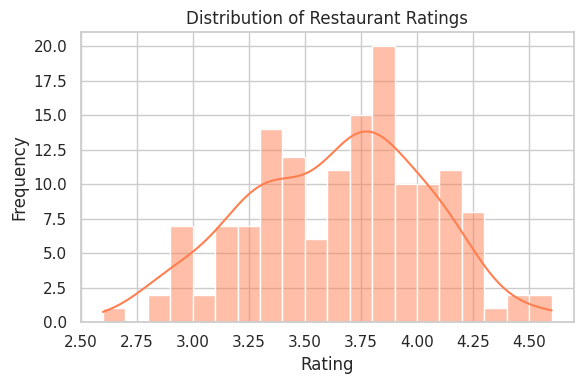

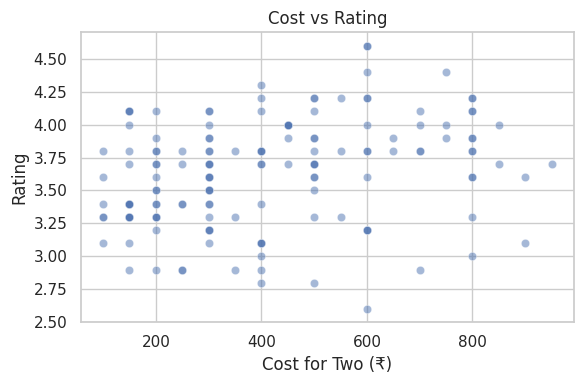

<ipython-input-9-544d22b72261>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='online_order', y='rate', data=df_clean, palette='Set3')


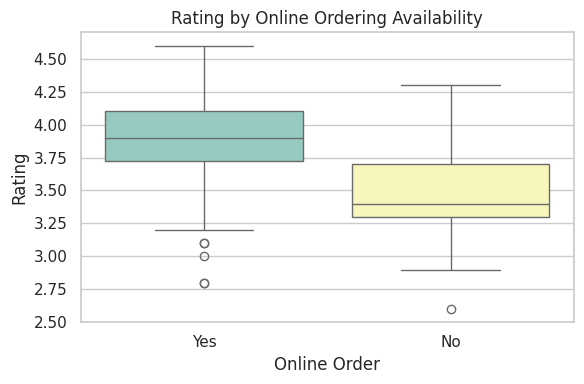

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/Zomato data .csv", encoding='latin-1')

# Rename column for ease of use
df.rename(columns={'approx_cost(for two people)': 'cost_for_two'}, inplace=True)

# Clean cost and rate columns
df['cost_for_two'] = df['cost_for_two'].astype(str).str.replace(',', '')
df['cost_for_two'] = pd.to_numeric(df['cost_for_two'], errors='coerce')
df['rate'] = df['rate'].astype(str).str.extract(r'(\d+\.\d+)')
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['rate'], bins=20, kde=True, color='coral')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Scatter plot: cost vs rating
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df_clean, x='cost_for_two', y='rate', alpha=0.5)
plt.title('Cost vs Rating')
plt.xlabel('Cost for Two (₹)')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

# Boxplot: rating by online_order
plt.figure(figsize=(6, 4))
sns.boxplot(x='online_order', y='rate', data=df_clean, palette='Set3')
plt.title('Rating by Online Ordering Availability')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()